# Pasos iniciales

Lo primero que debemos hacer es cargar los imports necesarios y cargar los datos que vamos a utilizar.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)

# Rutas
ruta_train = "../data/Datos Lab 1.csv"
ruta_test  = "../data/Datos Test Lab 1.csv"
ruta_dicc  = "../data/DiccPacientes.xlsx"

def cargar_csv(ruta):
    try:
        df = pd.read_csv(ruta)
        if df.shape[1] == 1:
            df = pd.read_csv(ruta, sep=";")
    except:
        df = pd.read_csv(ruta, sep=";")
    return df

datos_entrenamiento = cargar_csv(ruta_train)
datos_prueba = cargar_csv(ruta_test)

print("Train:", datos_entrenamiento.shape)
print("Test: ", datos_prueba.shape)

datos_entrenamiento.head()

Train: (1639, 24)
Test:  (194, 22)


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,60.0,150.0,N,N,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH


## 1. Exploración y perfilamiento de los datos (10%)

**Objetivo:** comprender la estructura del dataset, calidad (faltantes/duplicados), tipos de variables y distribución de la variable objetivo (**CVD Risk Score**).  
Este análisis guiará las decisiones de preparación e ingeniería de características.

In [3]:
# Estructura general
display(datos_entrenamiento.head(3))
display(datos_prueba.head(3))

# Tipos de datos + nulos por columna 
print("=== info train ===")
print(datos_entrenamiento.info())

print("\n=== info test ===")
print(datos_prueba.info())

# Nombres de columnas (para verificar objetivo y consistencia)
print("\nColumnas train:", list(datos_entrenamiento.columns))
print("\nColumnas test: ", list(datos_prueba.columns))

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,60.0,150.0,N,N,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL)
0,WYTG8678,1/12/2021,M,44.0,51.936,1.936,36.442,115.755,105/108,107.0,52.0,125.0,Y,Y,Low,N,193.61,0.598,105.0,108.0,Hypertension Stage 2,25.0
1,yloc1993,12-25-2020,F,30.0,115.000,1.830,34.300,93.600,139/79,100.0,31.0,125.0,Y,N,Moderate,N,183.00,0.511,139.0,79.0,Hypertension Stage 1,39.0
2,DDwq7653,23-sep-21,M,38.0,63.300,1.700,21.900,93.800,93/67,NaN,76.0,73.0,N,Y,High,N,170.00,0.552,93.0,67.0,Normal,182.0


=== info train ===
<class 'pandas.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   str    
 1   Date of Service               1639 non-null   str    
 2   Sex                           1639 non-null   str    
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                           1586 non-null   float64
 7   Abdominal Circumference (cm)  1578 non-null   float64
 8   Blood Pressure (mmHg)         1639 non-null   str    
 9   Total Cholesterol (mg/dL)     1571 non-null   float64
 10  HDL (mg/dL)                   1557 non-null   float64
 11  Fasting Blood Sugar (mg/dL)   1585 non-null   float64
 12  Smoking Status                1639 non-null   str    


### Estructura del conjunto de datos

El conjunto de datos de entrenamiento contiene información demográfica, clínica y de hábitos de vida de los pacientes, junto con la variable objetivo **CVD Risk Score**, que representa el riesgo cardiovascular de forma continua.

El conjunto de datos de prueba mantiene la misma estructura, pero no incluye la variable objetivo, ya que será utilizado posteriormente para generar predicciones.

## Relacion de la variable objetivo con todas las demas variables


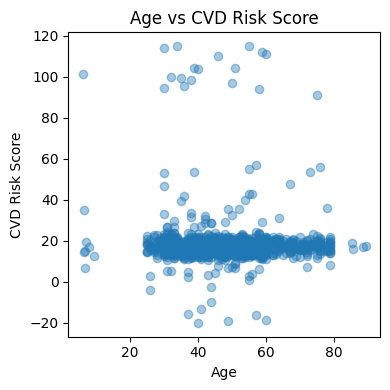

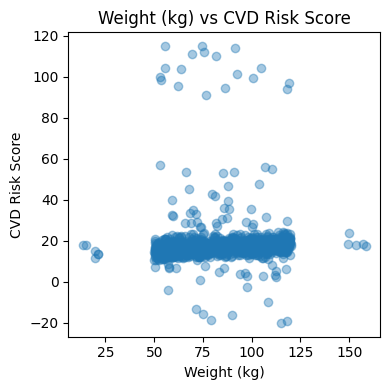

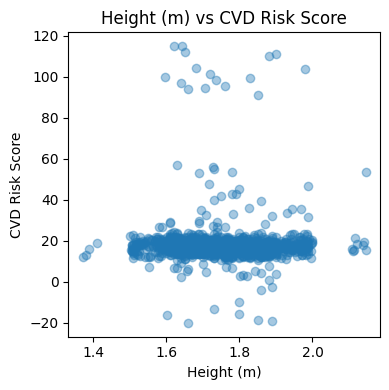

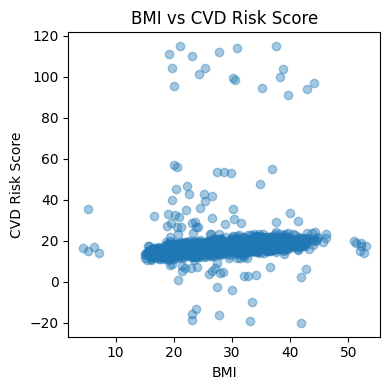

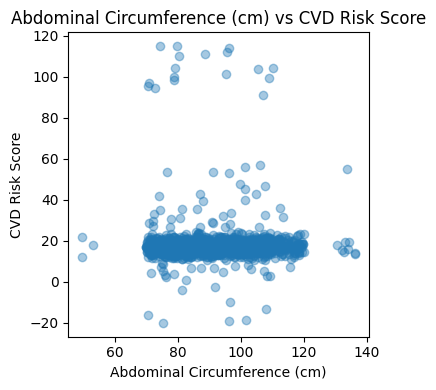

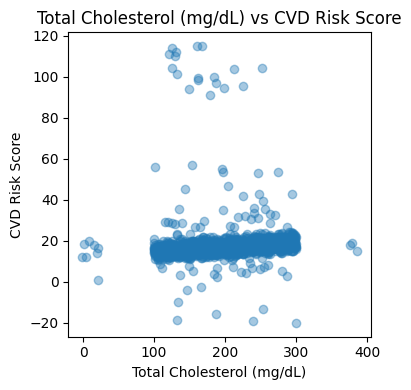

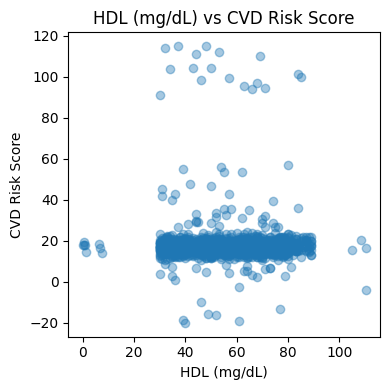

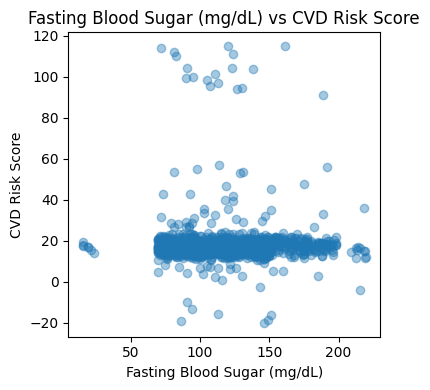

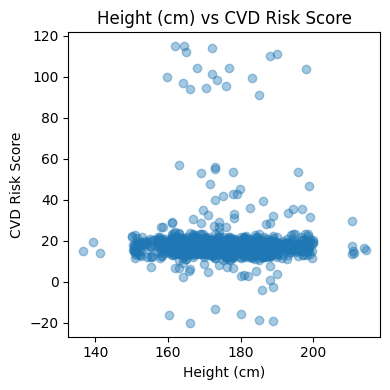

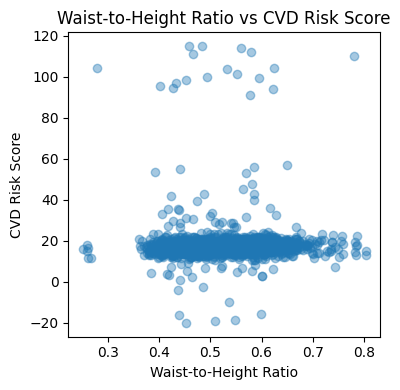

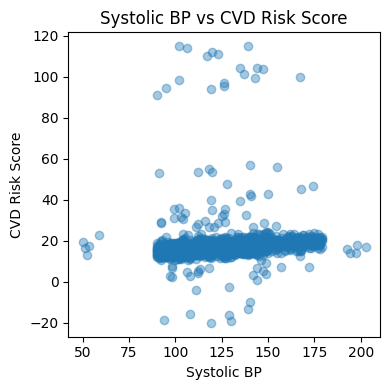

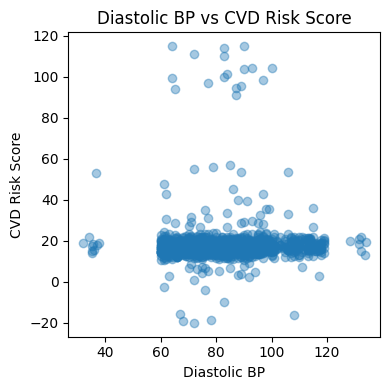

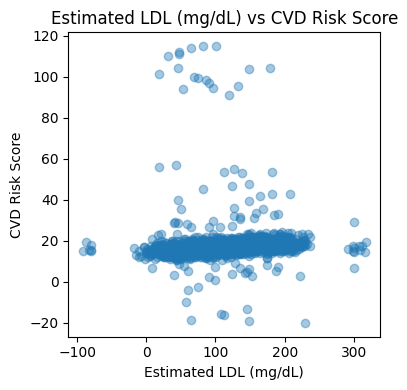

In [19]:
objetivo = "CVD Risk Score"
df = datos_entrenamiento.copy()

# separar X e y
X = df.drop(columns=[objetivo], errors="ignore")
y = df[objetivo]

# identificar tipos
numericas = X.select_dtypes(include=np.number).columns
categoricas = X.select_dtypes(exclude=np.number).columns

for col in numericas:
    plt.figure(figsize=(4,4))
    plt.scatter(X[col], y, alpha=0.4)
    plt.xlabel(col)
    plt.ylabel(objetivo)
    plt.title(f"{col} vs {objetivo}")
    plt.tight_layout()
    plt.show()

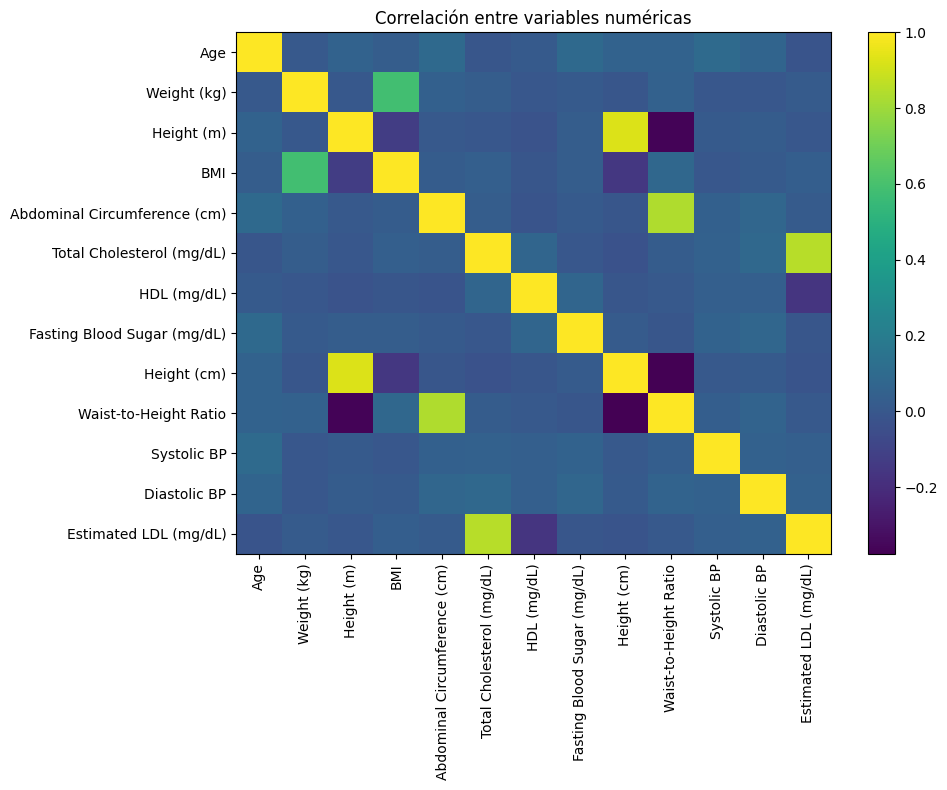

In [20]:
df = datos_entrenamiento.copy()

# solo numéricas
numericas = df.select_dtypes(include=np.number)

# quitar el objetivo
numericas = numericas.drop(columns=["CVD Risk Score"], errors="ignore")

corr = numericas.corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, aspect="auto")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlación entre variables numéricas")
plt.tight_layout()
plt.show()

# Datos faltantes
Verificamos los datos faltantes

In [5]:
# Faltantes
faltantes_train = datos_entrenamiento.isna().sum().sort_values(ascending=False)
faltantes_test  = datos_prueba.isna().sum().sort_values(ascending=False)

print("Faltantes (train) - top 15")
display(faltantes_train.head(15))

print("Faltantes (test) - top 15")
display(faltantes_test.head(15))

# % faltantes (más interpretables)
porc_faltantes_train = (datos_entrenamiento.isna().mean()*100).sort_values(ascending=False)
porc_faltantes_test  = (datos_prueba.isna().mean()*100).sort_values(ascending=False)

print("% faltantes (train) - top 15")
display(porc_faltantes_train.head(15))

print("% faltantes (test) - top 15")
display(porc_faltantes_test.head(15))

# Duplicados
duplicados_filas_train = datos_entrenamiento.duplicated().sum()
duplicados_filas_test  = datos_prueba.duplicated().sum()

print("Duplicados filas (train):", duplicados_filas_train)
print("Duplicados filas (test): ", duplicados_filas_test)

# Duplicados de ID (no necesariamente "error", pero hay que reportarlo)
if "Patient ID" in datos_entrenamiento.columns:
    print("Patient ID duplicado (train):", datos_entrenamiento["Patient ID"].duplicated().sum())
if "Patient ID" in datos_prueba.columns:
    print("Patient ID duplicado (test): ", datos_prueba["Patient ID"].duplicated().sum())

Faltantes (train) - top 15


Diastolic BP                    85
HDL (mg/dL)                     82
Waist-to-Height Ratio           76
Weight (kg)                     73
Height (cm)                     68
Age                             68
Total Cholesterol (mg/dL)       68
Height (m)                      61
Abdominal Circumference (cm)    61
Systolic BP                     61
Estimated LDL (mg/dL)           57
Fasting Blood Sugar (mg/dL)     54
BMI                             53
CVD Risk Score                  29
Patient ID                       0
dtype: int64

Faltantes (test) - top 15


Age                             11
Weight (kg)                     10
BMI                              8
HDL (mg/dL)                      8
Height (cm)                      7
Height (m)                       7
Abdominal Circumference (cm)     7
Systolic BP                      6
Total Cholesterol (mg/dL)        6
Waist-to-Height Ratio            6
Fasting Blood Sugar (mg/dL)      5
Diastolic BP                     5
Estimated LDL (mg/dL)            5
Diabetes Status                  0
Physical Activity Level          0
dtype: int64

% faltantes (train) - top 15


Diastolic BP                    5.186089
HDL (mg/dL)                     5.003051
Waist-to-Height Ratio           4.636974
Weight (kg)                     4.453935
Height (cm)                     4.148871
Age                             4.148871
Total Cholesterol (mg/dL)       4.148871
Height (m)                      3.721782
Abdominal Circumference (cm)    3.721782
Systolic BP                     3.721782
Estimated LDL (mg/dL)           3.477730
Fasting Blood Sugar (mg/dL)     3.294692
BMI                             3.233679
CVD Risk Score                  1.769372
Patient ID                      0.000000
dtype: float64

% faltantes (test) - top 15


Age                             5.670103
Weight (kg)                     5.154639
BMI                             4.123711
HDL (mg/dL)                     4.123711
Height (cm)                     3.608247
Height (m)                      3.608247
Abdominal Circumference (cm)    3.608247
Systolic BP                     3.092784
Total Cholesterol (mg/dL)       3.092784
Waist-to-Height Ratio           3.092784
Fasting Blood Sugar (mg/dL)     2.577320
Diastolic BP                    2.577320
Estimated LDL (mg/dL)           2.577320
Diabetes Status                 0.000000
Physical Activity Level         0.000000
dtype: float64

Duplicados filas (train): 151
Duplicados filas (test):  5
Patient ID duplicado (train): 263
Patient ID duplicado (test):  5


### Análisis de valores faltantes

A partir del conteo y porcentaje de valores faltantes, se identifican variables con ausencia de datos que deberán ser tratadas en la etapa de preparación.  
La presencia de valores faltantes influye directamente en el desempeño del modelo de regresión lineal, por lo que estas observaciones guiarán las decisiones de imputación o eliminación de variables.

# Miramos ahora la variable que tenemos como objetivo

Resumen objetivo:


count    1610.000000
mean       18.227281
std        10.767666
min       -20.057000
25%        15.150000
50%        16.967000
75%        18.900000
max       114.980000
Name: CVD Risk Score, dtype: float64

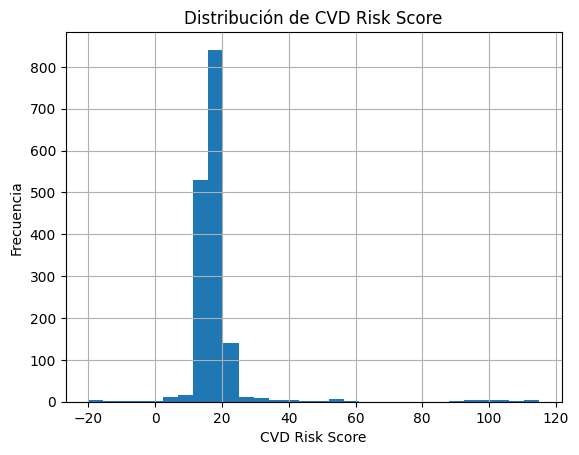

In [6]:
# Solo esta en los datos de train
objetivo = "CVD Risk Score"

print("Resumen objetivo:")
display(datos_entrenamiento[objetivo].describe())

# La graficamos en barras
plt.figure()
datos_entrenamiento[objetivo].hist(bins=30)
plt.title("Distribución de CVD Risk Score")
plt.xlabel("CVD Risk Score")
plt.ylabel("Frecuencia")
plt.show()

### Variable objetivo: CVD Risk Score

La distribución de la variable objetivo permite evaluar su rango, dispersión y posible presencia de valores atípicos.  
Este análisis es importante para verificar si la regresión lineal es un modelo razonable para aproximar la relación entre las variables predictoras y el riesgo cardiovascular.

# conteos de variables categóricas
para entender calidad de los datos

In [7]:
categoricas = [
    "Sex", "Smoking Status", "Diabetes Status",
    "Physical Activity Level", "Family History of CVD",
    "Blood Pressure Category", "CVD Risk Level"
]

for col in categoricas:
    if col in datos_entrenamiento.columns:
        print(f"\n=== {col} (train) ===")
        display(datos_entrenamiento[col].value_counts(dropna=False))


=== Sex (train) ===


Sex
M    821
F    818
Name: count, dtype: int64


=== Smoking Status (train) ===


Smoking Status
Y    850
N    789
Name: count, dtype: int64


=== Diabetes Status (train) ===


Diabetes Status
N    821
Y    818
Name: count, dtype: int64


=== Physical Activity Level (train) ===


Physical Activity Level
High        582
Moderate    537
Low         520
Name: count, dtype: int64


=== Family History of CVD (train) ===


Family History of CVD
N    820
Y    819
Name: count, dtype: int64


=== Blood Pressure Category (train) ===


Blood Pressure Category
Hypertension Stage 2    680
Hypertension Stage 1    527
Normal                  321
Elevated                111
Name: count, dtype: int64


=== CVD Risk Level (train) ===


CVD Risk Level
HIGH            793
INTERMEDIARY    616
LOW             230
Name: count, dtype: int64

### Variables categóricas

Se analizan las frecuencias de las variables categóricas con el fin de identificar posibles desbalances entre categorías.  
Esta información será relevante para decidir el tipo de codificación a utilizar durante la preparación de los datos.

### Conclusiones de la exploración

La exploración de los datos permitió identificar la estructura del conjunto de datos, la presencia de valores faltantes, la distribución de la variable objetivo y el comportamiento de las variables categóricas.  

Con base en estos hallazgos, en la siguiente sección se realizarán las decisiones de limpieza, transformación y preparación de los datos necesarias para la construcción de los modelos de regresión lineal.

### 2. Preparación de los datos 

En esta sección se realizan las transformaciones necesarias para preparar los datos antes del entrenamiento de los modelos de regresión lineal.  
Las decisiones tomadas se justifican con base en los resultados obtenidos durante la exploración.

## Eliminacion de datos duplicados
Con base en la exploración realizada, se identificaron registros duplicados en el conjunto de datos.
Dado que estos registros no aportan nueva información y pueden sesgar el entrenamiento del modelo, se decide eliminarlos del conjunto de entrenamiento.

In [8]:
duplicados_filas_test = datos_entrenamiento.duplicated().sum()
print("las filas duplicadas son:", duplicados_filas_test)
datos_entrenamiento = datos_entrenamiento.drop_duplicates()
print("el numero de filas despues de eliminar duplicados es:", datos_entrenamiento.shape[0])
# Duplicados por Patient ID (si existe la columna)
if "Patient ID" in datos_entrenamiento.columns:
    duplicados_id = datos_entrenamiento["Patient ID"].duplicated().sum()
    print(f"Patient ID duplicados: {duplicados_id}")

las filas duplicadas son: 151
el numero de filas despues de eliminar duplicados es: 1488
Patient ID duplicados: 112


## Separar la variable objetico y las predictorias
Se define **CVD Risk Score** como variable objetivo, al ser una variable continua que representa el riesgo cardiovascular.  
Las demás variables se utilizan como predictores.

In [9]:
objetivo = "CVD Risk Score"
datos_entrenamiento = datos_entrenamiento.dropna(subset=[objetivo])
X = datos_entrenamiento.drop(columns=[objetivo, "CVD Risk Level"], errors="ignore")
y = datos_entrenamiento[objetivo]
print(y.isna().sum())
print(X.shape)
print(y.shape)
X.head()

0
(1460, 22)
(1460,)


,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL)
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,77.0,91.0,Y,Y,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,71.0,76.0,N,Y,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,60.0,150.0,N,N,High,N,165.000,0.473,90.0,74.0,Normal,45.0
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,34.0,111.0,Y,N,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,49.0,147.0,Y,Y,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0


### División entrenamiento y prueba

Con el fin de evaluar el desempeño de los modelos de regresión lineal sobre datos no vistos, el conjunto de datos se divide en entrenamiento y prueba.  
Se utiliza un 25% de los datos para el conjunto de prueba y una semilla fija para garantizar la reproducibilidad de los resultados.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)
print("NaN en y_train:", y_train.isna().sum())
print("NaN en y_test :", y_test.isna().sum())

X_train: (1095, 22)
X_test : (365, 22)
y_train: (1095,)
y_test : (365,)
NaN en y_train: 0
NaN en y_test : 0


## Identificar variables numericas y categóricas

vamos a revisara los tipos de variables de la base de datos

In [11]:
cl_numericas = X_train.select_dtypes(include=np.number).columns.tolist()
cl_categoricas = X_train.select_dtypes(exclude=np.number).columns.tolist()

print("El numero de variables numerias es: ", len(cl_numericas))
print("El numero de variables categoricas es: ", len(cl_categoricas))

print(cl_numericas)
print(cl_categoricas)

El numero de variables numerias es:  13
El numero de variables categoricas es:  9
['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP', 'Estimated LDL (mg/dL)']
['Patient ID', 'Date of Service', 'Sex', 'Blood Pressure (mmHg)', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD', 'Blood Pressure Category']


Tratamiento de valores faltantes (imputación)

Con base en el análisis de valores faltantes de la Actividad 1, se define una estrategia de imputación para conservar la mayor cantidad de información posible.  
- Para variables **numéricas**, se utiliza la **mediana** (robusta ante valores atípicos).  
- Para variables **categóricas**, se utiliza la **moda** (valor más frecuente).  

Estas transformaciones se integrarán posteriormente dentro de pipelines para evitar fuga de información y garantizar consistencia.

In [12]:
from sklearn.impute import SimpleImputer

imputador_numerico = SimpleImputer(strategy="median")
imputador_categorico = SimpleImputer(strategy="most_frequent")

print("Los imputadores de datos son: ")
print("Imputador numérico:", imputador_numerico)
print("Imputador categórico:", imputador_categorico)

Los imputadores de datos son: 
Imputador numérico: SimpleImputer(strategy='median')
Imputador categórico: SimpleImputer(strategy='most_frequent')


### Codificación de variables categóricas

Para que el modelo de regresión lineal pueda trabajar con variables categóricas, estas se transforman a variables numéricas mediante **one-hot encoding**.  

- Se usa `drop="first"` para eliminar una categoría de referencia y reducir riesgo de multicolinealidad.  
- Se usa `handle_unknown="ignore"` para evitar errores si en test aparecen categorías no vistas en entrenamiento.  

La codificación se integrará dentro de pipelines para garantizar que el mismo preprocesamiento se aplique durante entrenamiento y evaluación.

In [13]:
from sklearn.preprocessing import OneHotEncoder

codificador_categorico = OneHotEncoder(handle_unknown="ignore", drop="first")
print("Codificador categórico definido: ", codificador_categorico)

Codificador categórico definido:  OneHotEncoder(drop='first', handle_unknown='ignore')


### Escalamiento de variables numéricas

Se realiza el escalamiento de las variables numéricas para llevarlas a una escala comparable y facilitar el entrenamiento del modelo.  
Se utiliza `StandardScaler`, que centra los datos en 0 y los escala a desviación estándar 1.

Este paso se integrará dentro de pipelines para evitar fuga de información (el escalador se ajusta solo con train).

In [14]:
from sklearn.preprocessing import StandardScaler

escalador_numerico = StandardScaler()

print("Escalador numérico definido: StandardScaler()")

Escalador numérico definido: StandardScaler()


### Construcción del preprocesador 

Se construye un preprocesador que aplica transformaciones distintas según el tipo de variable:

- **Numéricas:** imputación (mediana) + escalamiento (StandardScaler)  
- **Categóricas:** imputación (moda) + one-hot encoding  

Este preprocesador será reutilizado dentro de pipelines para entrenar y evaluar modelos de forma consistente.

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pipeline_numerico = Pipeline(steps=[
    ("imputacion", imputador_numerico),
    ("escalamiento", escalador_numerico)
])

# Pipeline para categóricas
pipeline_categorico = Pipeline(steps=[
    ("imputacion", imputador_categorico),
    ("onehot", codificador_categorico)
])

# Preprocesador final
preprocesador = ColumnTransformer(
    transformers=[
        ("num", pipeline_numerico, cl_numericas),
        ("cat", pipeline_categorico, cl_categoricas)
    ],
    remainder="drop"
)


## Construcción de modelos de regresión lineal 

En esta sección se construyen al menos dos modelos de regresión lineal utilizando **pipelines**, integrando el preprocesamiento definido anteriormente.  
Los modelos se entrenan sobre el conjunto de entrenamiento y se evalúan inicialmente con **RMSE** sobre el conjunto de prueba.

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluar_modelo(nombre_modelo, modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)

    rmse = mean_squared_error(y_test, pred) ** 0.5
    mae  = mean_absolute_error(y_test, pred)
    r2   = r2_score(y_test, pred)

    print(f"{nombre_modelo} -> RMSE: {rmse:.4f} | MAE: {mae:.4f} | R2: {r2:.4f}")
    return {"Modelo": nombre_modelo, "RMSE": rmse, "MAE": mae, "R2": r2}

### Modelo 1 — Regresión lineal (baseline)

Se construye un modelo base de regresión lineal utilizando el preprocesador definido (imputación + escalamiento + one-hot encoding).  
Este modelo sirve como referencia para comparar mejoras con otras estrategias.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

modelo_1 = Pipeline(steps=[
    ("preprocesamiento", preprocesador),
    ("modelo", LinearRegression())
])

resultados = []
resultados.append(evaluar_modelo("Modelo 1 - LinearRegression", modelo_1, X_train, y_train, X_test, y_test))

Modelo 1 - LinearRegression -> RMSE: 11.1841 | MAE: 4.2860 | R2: -0.0745


/Users/danieldiab/.pyenv/versions/3.13.2/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [0, 1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


**Interpretación (Modelo 1):**  
El modelo base obtiene un **RMSE = 11.1841** y **MAE = 4.2860**, lo que indica un error promedio de magnitud moderada en las predicciones (en unidades de *CVD Risk Score*).  
El **R² = -0.0745** sugiere que el modelo, en el conjunto de prueba, **no logra explicar la variabilidad del objetivo** y su desempeño es **peor que un predictor trivial** que siempre predice el promedio del conjunto de entrenamiento.  
Este resultado motiva comparar con estrategias alternativas (por ejemplo, regularización) para evaluar si mejora la generalización.

### Modelo 2 — Regresión Ridge (regularización L2)

Se construye un segundo modelo de regresión lineal utilizando Ridge, el cual incorpora un término de regularización L2.  
Esta estrategia permite controlar la magnitud de los coeficientes y mejorar la capacidad de generalización del modelo.

In [18]:
from sklearn.linear_model import Ridge

modelo_2 = Pipeline(steps=[
    ("preprocesamiento", preprocesador),
    ("modelo", Ridge(alpha=1.0, random_state=42))
])

resultados.append(
    evaluar_modelo(
        "Modelo 2 - Ridge (alpha=1.0)",
        modelo_2,
        X_train,
        y_train,
        X_test,
        y_test
    )
)

Modelo 2 - Ridge (alpha=1.0) -> RMSE: 10.9783 | MAE: 4.0985 | R2: -0.0354


/Users/danieldiab/.pyenv/versions/3.13.2/lib/python3.13/site-packages/sklearn/preprocessing/_encoders.py:261: UserWarning: Found unknown categories in columns [0, 1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(msg, UserWarning)


**Interpretación (Modelo 2):**  
El modelo Ridge obtiene **RMSE = 10.9783** y **MAE = 4.0985**, mostrando una **mejora leve** frente al modelo base en ambas métricas.  
El **R² = -0.0354** sigue siendo negativo, por lo que el modelo aún **no explica adecuadamente** la variación del objetivo en el conjunto de prueba; sin embargo, al ser menos negativo que el del baseline, su ajuste relativo es ligeramente mejor.  
En conjunto, la regularización L2 aporta una mejora pequeña, por lo que se requiere una comparación formal en una tabla y eventualmente explorar hiperparámetros (alpha) o ingeniería de características.